In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Convert data to Pandas DataFrame
col_names = ['Date', 'Class A Hong Kong', 'Class A Kowloon', 'Class A New Territories', 
             'Class B Hong Kong', 'Class B Kowloon', 'Class B New Territories',
             'Class C Hong Kong', 'Class C Kowloon', 'Class C New Territories',
             'Class D Hong Kong', 'Class D Kowloon', 'Class D New Territories', 
             'Class E Hong Kong', 'Class E Kowloon', 'Class E New Territories']

df = pd.read_csv("1.1M.csv", names=col_names, header=0)

# Convert the first column (Date) to datetime format
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])

# Check the data type of the first column
df.iloc[:, 0].dtype

dtype('<M8[ns]')

In [2]:
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])

df.iloc[:, 0].dtype

dtype('<M8[ns]')

In [3]:
df.head()

,Date,Class A Hong Kong,Class A Kowloon,Class A New Territories,Class B Hong Kong,Class B Kowloon,Class B New Territories,Class C Hong Kong,Class C Kowloon,Class C New Territories,Class D Hong Kong,Class D Kowloon,Class D New Territories,Class E Hong Kong,Class E Kowloon,Class E New Territories
0,1999-01-01,190,171,133,199,165,118,249,187,150,284,198,185,301,185,191
1,1999-01-02,196,173,133,204,165,114,239,177,144,268,196,173,311,213,152
2,1999-01-03,199,170,133,197,160,117,247,177,142,262,174,186,301,194,190
3,1999-01-04,191,171,135,200,156,116,256,182,134,279,172,170,313,221,172
4,1999-01-05,191,175,127,188,155,113,233,175,133,279,180,180,289,168,162


In [4]:
df.iloc[125, 0]

Timestamp('2009-01-06 00:00:00')

In [5]:
df.iloc[210, 0]

Timestamp('2016-01-07 00:00:00')

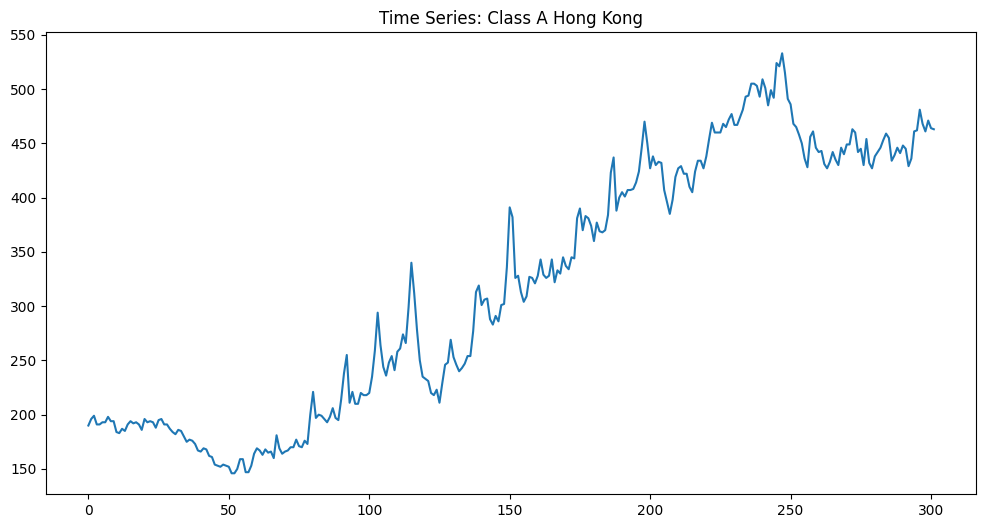

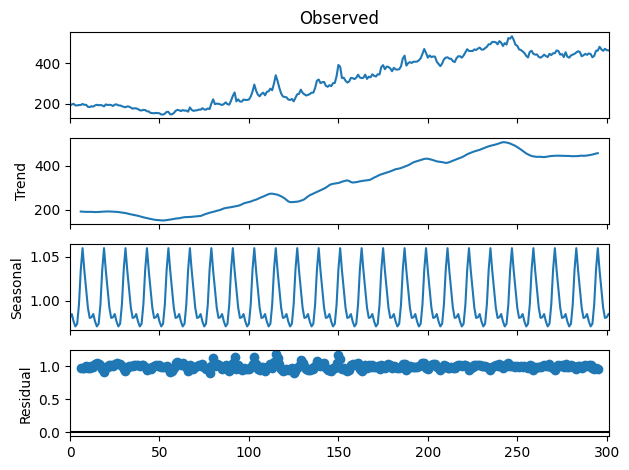

[463.28729174 463.20178565 463.14743976 463.1192673  463.10490096
 463.09758586 463.09386164 463.09196561 463.09100033 463.0905089
 463.0902587  463.09013133]


In [6]:
# Select the category for analysis
category = 'Class A Hong Kong'
series = df[category].values
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(series)
plt.title(f'Time Series: {category}')
plt.show()

# Perform seasonal decomposition
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
plt.show()

# Train ARIMA model and forecast for the next 12 months
model = ARIMA(series, order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
print(forecast)

In [7]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# 加载数据
col_names = ['Date', 'Class A Hong Kong', 'Class A Kowloon', 'Class A New Territories', 
             'Class B Hong Kong', 'Class B Kowloon', 'Class B New Territories',
             'Class C Hong Kong', 'Class C Kowloon', 'Class C New Territories',
             'Class D Hong Kong', 'Class D Kowloon', 'Class D New Territories', 
             'Class E Hong Kong', 'Class E Kowloon', 'Class E New Territories']

df = pd.read_csv("1.1M.csv", names=col_names, header=0)
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])

# 选择预测目标
target_col = 'Class A Hong Kong'
target_data = df[target_col].values

# 数据标准化
scaler = MinMaxScaler()
target_data = scaler.fit_transform(target_data.reshape(-1, 1))

# 构造监督学习数据
look_back = 12  # 使用过去12个时间步作为输入
X, y = [], []
for i in range(look_back, len(target_data)):
    X.append(target_data[i-look_back:i])
    y.append(target_data[i])
X, y = np.array(X), np.array(y)

# 划分训练集和测试集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 构建LSTM模型
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# 评估模型
mse = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse}')

# 进行预测
future_sales = []
input_data = target_data[-look_back:]
for _ in range(12):  # 预测未来12个月
    input_data = input_data.reshape(1, look_back, 1)
    future_sale = model.predict(input_data)
    future_sales.append(future_sale[0][0])
    input_data = np.append(input_data[0], future_sale)[1:]

# 反标准化预测值
future_sales = scaler.inverse_transform(np.array(future_sales).reshape(-1, 1))
print(f'Future Sales Forecast: {future_sales}')

c:\Users\Nick\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.1167 - val_loss: 0.0144
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0092 - val_loss: 0.0280
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0098 - val_loss: 0.0037
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0030 - val_loss: 0.0062
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0025 - val_loss: 0.0048
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0028 - val_loss: 0.0050
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031 - val_lo

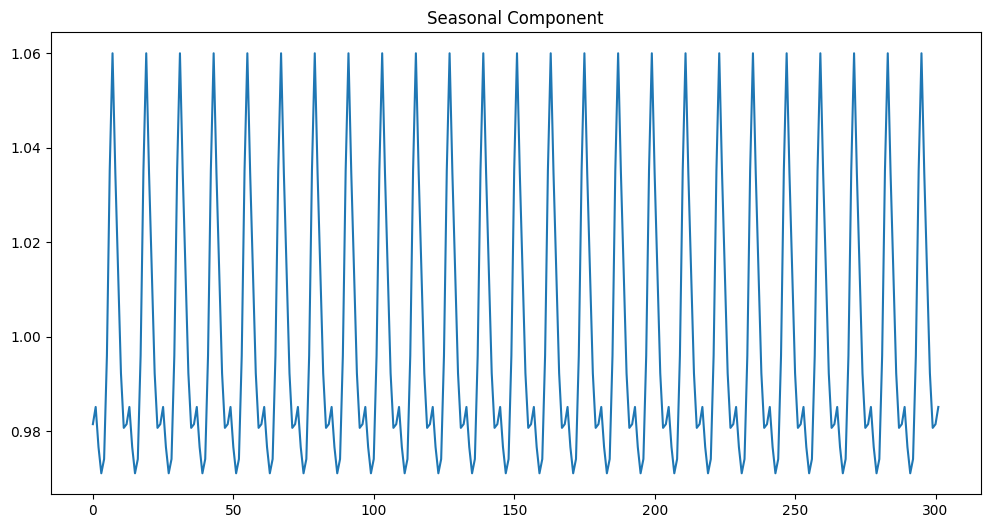

Month 1: 0.0390022944156216
Month 2: 0.03914717751716183
Month 3: 0.03881035283328149
Month 4: 0.0385888618466676
Month 5: 0.038708568001982566
Month 6: 0.0395799682883423
Month 7: 0.04113862287685421
Month 8: 0.042124670746619415
Month 9: 0.0411140264528256
Month 10: 0.04025789166529263
Month 11: 0.039430486316879926
Month 12: 0.03897110016115951


In [8]:
seasonal_component = result.seasonal

# 绘制季节成分图
plt.figure(figsize=(12, 6))
plt.plot(seasonal_component)
plt.title('Seasonal Component')
plt.show()

seasonal_indices = seasonal_component / np.sum(seasonal_component) * 12
# print(seasonal_indices)

months = np.arange(1, 13)  # 建立1到12的月份列表
seasonal_indices_dict = dict(zip(months, seasonal_indices))

for month, index in seasonal_indices_dict.items():
    print(f"Month {month}: {index}")

In [9]:
# 读取数据
df_population = pd.read_csv("population.csv")
df_gdp = pd.read_csv("GDP.csv")
df_yearRent = pd.read_csv("1.1A(from_99).csv")
df_vacancy = pd.read_csv("Private_Domestic-Vacancy.csv")
df_stock = pd.read_csv("Private_Domestic-Stock.csv")
df_taskup = pd.read_csv("Private_Domestic-Take-up.csv")

# 合并两个数据框
merged_df = pd.merge(df_gdp, df_population, how='outer', left_on='year', right_on='Year')
merged_df = pd.merge(merged_df, df_yearRent, left_on='year', right_on='Year', how='outer')

# Assuming your data is in a DataFrame called 'df'
merged_df['Class A Hong Kong difference'] = merged_df['Class A Hong Kong'].diff().apply(lambda x: 1 if x > 0 else 0)

# Fill the first row with 0 since there's no previous value to compare
merged_df.loc[0, 'Class A Hong Kong difference'] = 0

merged_df = pd.merge(merged_df, df_vacancy, left_on='year', right_on='Year', how='outer')
merged_df = pd.merge(merged_df, df_stock, left_on='year', right_on='Year', how='outer', suffixes=('_vacancy', '_stock'))
merged_df = pd.merge(merged_df, df_taskup, left_on='year', right_on='Year', how='outer')

# Filter the merged dataframe to keep only rows from 1999 onwards
merged_df = merged_df[merged_df['year'] >= 1999]

In [10]:
merged_df.head()

,year,GDP,Year_x,All age group population,Year_y,Class A Hong Kong,Class A Kowloon,Class A New Territories,Class B Hong Kong,Class B Kowloon,...,Class A (Stock),Class B (Stock),Class C (Stock),Class D (Stock),Class E (Stock),Total (Stock),Year,Take Up (SA Less than 100 m2),Take up (SA 100 m2 or above),Take up (Total)
38,1999,1285946,1999,6606.5,1999.0,193.0,173.0,133.0,197.0,157.0,...,354000.0,468513.0,102180.0,49586.0,23354.0,997633.0,1999.0,17070.0,2490.0,19560.0
39,2000,1337501,2000,6665.0,2000.0,192.0,166.0,130.0,198.0,149.0,...,358723.0,483877.0,107699.0,52082.0,23724.0,1026105.0,2000.0,28240.0,940.0,29180.0
40,2001,1321142,2001,6714.3,2001.0,187.0,153.0,120.0,191.0,146.0,...,361243.0,501137.0,110624.0,53646.0,24112.0,1050762.0,2001.0,17220.0,2100.0,19320.0
41,2002,1297341,2002,6744.1,2002.0,165.0,134.0,105.0,168.0,132.0,...,367870.0,526741.0,118417.0,55351.0,25068.0,1093447.0,2002.0,19830.0,100.0,19930.0
42,2003,1256669,2003,6730.8,2003.0,152.0,122.0,93.0,147.0,120.0,...,343639.0,478438.0,112931.0,51185.0,21782.0,1007975.0,2003.0,20080.0,2410.0,22490.0


In [11]:
# Save the merged dataframe as a CSV file
merged_df.to_csv('merged_data.csv', index=False)

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'merged_df' is your DataFrame
merged_df = pd.read_csv("merged_data.csv") 

# Select the target variable and features
X = merged_df[['GDP', 'All age group population', 'Class A Hong Kong difference', 'Class A (Vacancy) - Unit', 'Class A (Stock)', 'Take Up (SA Less than 100 m2)']]
y = merged_df['Class A Hong Kong']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 446.2
R-squared: 0.9568278221561707


In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Select the target variable and features
X = merged_df[['GDP', 'All age group population', 'Class A Hong Kong difference', 'Class A (Vacancy) - Unit', 'Class A (Stock)', 'Take Up (SA Less than 100 m2)']]
X = X.dropna()
y = merged_df['Class A Hong Kong']
y = y.drop(y.index[-1])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 397.4
R-squared: 0.9628284083000965


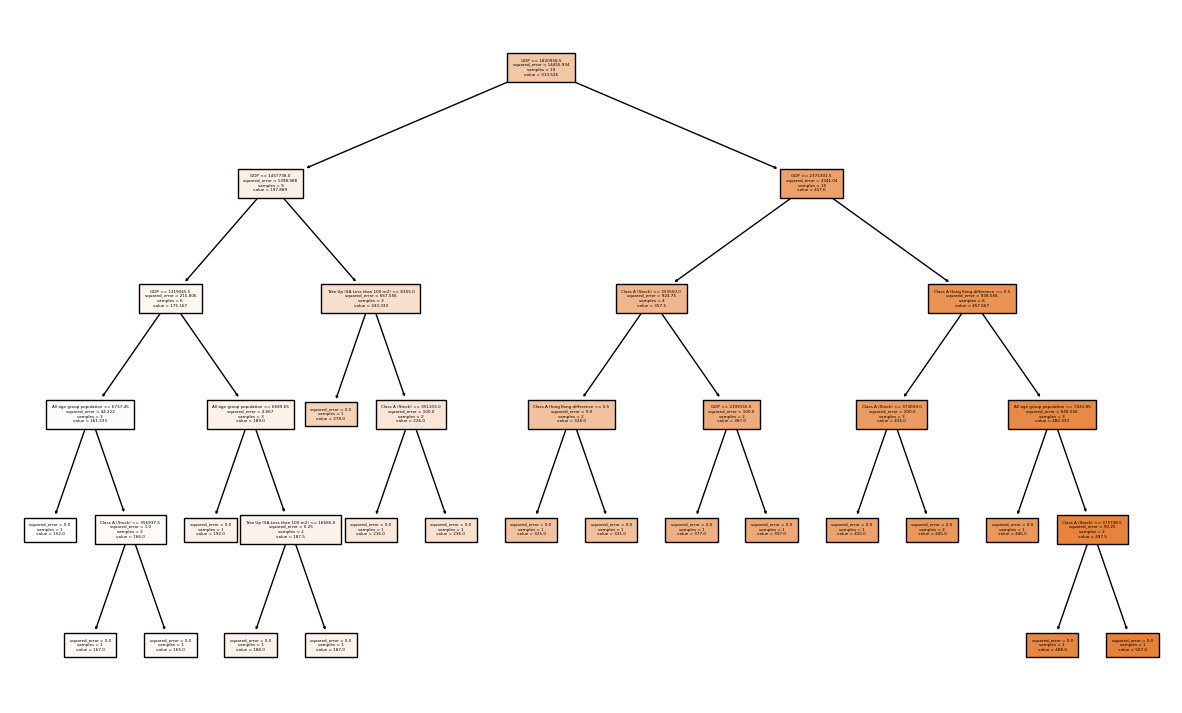

In [14]:
# Visualize the decision tree
plt.figure(figsize=(15, 9))  # Set figure size
plot_tree(dt_regressor, feature_names=X.columns, filled=True, fontsize=3)  # Adjust fontsize as needed
plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')  # Save the figure as 'decision_tree.png'
plt.show()